## Problem 3

## For  20NG TF as an autoencoder with a desired hidden layer size (try K=20, 100, 200). Verify the obtained reencoding of data (the new feature representation) in several ways: 

In [2]:
import numpy as np
from sklearn import datasets
import mnist 
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import random
import mnist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import matplotlib.pyplot as plt 
%matplotlib inline

# Loading the input data

In [3]:
#training data 


from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('C:/Users/Shantam Gupta/Desktop/MS in DS/Unsupervised ML- DS 5230/Fashion-mnist')


#Train data 
X_train = data.train.images
Y_train = data.train.labels

#Test Data 
X_test = data.test.images
Y_test= data.test.labels

Y_train = np.eye(10)[data.train.labels]
Y_test = np.eye(10)[data.test.labels]


C:\Users\Shantam Gupta\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting C:/Users/Shantam Gupta/Desktop/MS in DS/Unsupervised ML- DS 5230/Fashion-mnist\train-images-idx3-ubyte.gz
Extracting C:/Users/Shantam Gupta/Desktop/MS in DS/Unsupervised ML- DS 5230/Fashion-mnist\train-labels-idx1-ubyte.gz
Extracting C:/Users/Shantam Gupta/Desktop/MS in DS/Unsupervised ML- DS 5230/Fashion-mnist\t10k-images-idx3-ubyte.gz
Extracting C:/Users/Shantam Gupta/Desktop/MS in DS/Unsupervised ML- DS 5230/Fashion-mnist\t10k-labels-idx1-ubyte.gz


In [4]:
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

## Bulding Model  

In [5]:
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

#Accuracy on test data
print("Train Accuracy using Decision Trees:",clf.score(X_train,Y_train))

#Accuracy on test data
print("Test Accuracy using Decision Trees:",clf.score(X_test,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.7916


## Input & Output Placeholders

## K = 20

In [6]:
inputs = 784
hidden_layer1_units = 20
output_layer_units = inputs

In [7]:
X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

### Softmax Activation
$\Pr{(Y=j | X)}  = \frac{e^{(X.W_j^T + B_j)}}{\sum\limits_{i = 1}^n {e^{(X.W_i^T + B_i)}}} $

In [8]:
tf.set_random_seed(42)
W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}

In [9]:
encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

## Cost function: Cross Entropy
## Optimizer : Adam 

In [10]:
epochs = 10
batch_size = 256
learning_rate = 0.01

In [11]:
Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

## Evaluating

In [12]:
def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       #cost
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
            train_c += train_c/batch_size    
        if epoch % 5 == 0:
            print("\n Epoch:",epoch+1,"\t Average Train Eror:",train_c)  
            test_c = sess.run(loss,feed_dict = {X:X_test})
            print("\n Test Error", test_c)    
    encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
    encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test}) 


 Epoch: 1 	 Average Train Eror: 0.05305397757911123

 Test Error 0.05266911

 Epoch: 6 	 Average Train Eror: 0.033206059015356004

 Test Error 0.033421453


In [14]:
 encoder_train.shape, decoder_train.shape, encoder_test.shape, decoder_test.shape

((55000, 20), (55000, 784), (10000, 20), (10000, 784))

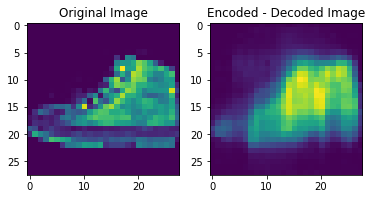

In [15]:
#Test Data 
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_train[i].reshape(28,28)
plt.imshow(img)

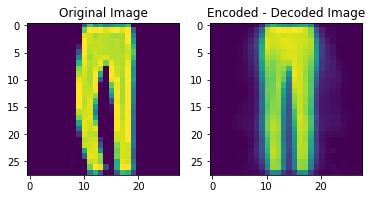

In [16]:
#Test Data 
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

## Building Model with reduced dimensions k = 20

In [17]:
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train,Y_train)

#Accuracy on test data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train,Y_train))

#Accuracy on test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.6737


## k = 100

In [18]:
inputs = 784
hidden_layer1_units = 100
output_layer_units = inputs
epochs = 10
batch_size = 100
learning_rate = 0.001

X = tf.placeholder(tf.float32, shape = [None, inputs]) #flattened shape

tf.set_random_seed(42)
W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}


encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       #cost
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
            train_c += train_c/batch_size    
        if epoch % 5 == 0:
            print("\n Epoch:",epoch+1,"\t Average Train Eror:",train_c)  
            test_c = sess.run(loss,feed_dict = {X:X_test})
            print("\n Test Error", test_c)    
    encoder_train_100, decoder_train_100 = sess.run([encoder,decoder],feed_dict = {X:X_train})
    encoder_test_100, decoder_test_100 = sess.run([encoder,decoder],feed_dict = {X:X_test}) 


 Epoch: 1 	 Average Train Eror: 0.09033134788274765

 Test Error 0.08698132

 Epoch: 6 	 Average Train Eror: 0.045268278494477274

 Test Error 0.045523237


In [19]:
encoder_train_100.shape, decoder_train_100.shape,encoder_test_100.shape, decoder_test_100.shape

((55000, 100), (55000, 784), (10000, 100), (10000, 784))

## Building Model with reduced dimensions k = 100

In [20]:
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_100,Y_train)

#Accuracy on test data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_100,Y_train))

#Accuracy on test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_100,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.7143


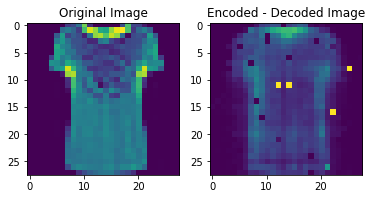

In [21]:
#train Data
i = 1
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))

plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_train_100[i].reshape(28,28)
plt.imshow(img)

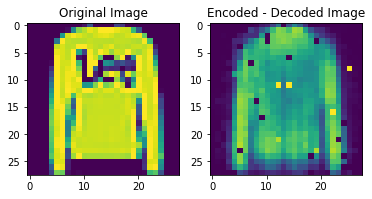

In [22]:
#test Data
i = 1
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))

plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test_100[i].reshape(28,28)
plt.imshow(img)

## K = 200

In [23]:
inputs = 784
hidden_layer1_units = 200
output_layer_units = inputs
epochs = 10
batch_size = 100
learning_rate = 0.001

X = tf.placeholder(tf.float32, shape = [None, inputs]) #flattened shape

tf.set_random_seed(42)
W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}


encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using softmax activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using softmax activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       #cost
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
            train_c += train_c/batch_size    
        if epoch % 5 == 0:
            print("\n Epoch:",epoch+1,"\t Average Train Eror:",train_c)  
            test_c = sess.run(loss,feed_dict = {X:X_test})
            print("\n Test Error", test_c)    
    encoder_train_200, decoder_train_200 = sess.run([encoder,decoder],feed_dict = {X:X_train})
    encoder_test_200, decoder_test_200 = sess.run([encoder,decoder],feed_dict = {X:X_test}) 


 Epoch: 1 	 Average Train Eror: 0.09868791870772839

 Test Error 0.09685414

 Epoch: 6 	 Average Train Eror: 0.04993384335190058

 Test Error 0.055533092


In [24]:
encoder_train_200.shape, decoder_train_200.shape

((55000, 200), (55000, 784))

## Building Model with reduced dimensions k = 200

In [25]:
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_200,Y_train)

#Accuracy on test data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_200,Y_train))

#Accuracy on test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_200,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.721


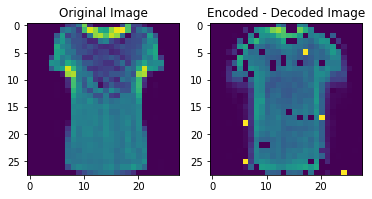

In [26]:
#train Data
i = 1
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))

plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_train_200[i].reshape(28,28)
plt.imshow(img)

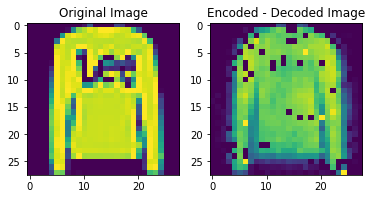

In [27]:
#test Data
i = 1
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))

plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test_200[i].reshape(28,28)
plt.imshow(img)